# STAT 301 Final Project
**Eric Liu** (November 2023)

# Group Plan (Remove before submission)

# Data

**Data Science Job Salaries:** https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

## Observations & Variables
This dataset contains information corresponding to a variety of data science jobs, with each of the 607 observations corresponding to an individual data science job information. The data contains 11 data variables (`X` is number of rows/index):

1. **`work_year`** - The year the salary was paid [`int`]
2. **`experience_level`** -The experience level in the job during the year [`chr`]
    - EN (Entry-level/Junior)
    - MI (Mid-level/Intermediate)
    - SE (Senior-level/Expert)
    - EX (Executive-level/Director)
3. **`employment_type`** - The type of employement for the role [`chr`]
    - PT (Part-time)
    - FT (Full-time)
    - CT (Contract)
    - FL (Freelance)
4. **`job_title`** - The role worked in during the year [`chr`]
5. **`salary`** - The total gross salary amount paid [`int`]
6. **`salary_currency`** - The currency of the salary paid as an ISO 4217 currency code [`chr`]
7. **`salary_in_usd`** - The salary in USD [`int`]
8. **`employee_residence`** - Employee's primary country of residence in during the work year as an ISO 3166 country code [`chr`]
9. **`remote_ratio`** - The overall amount of work done remotely [`int`]
    - 0 (No remote to 20%)
    - 50 (Partially remote)
    - 100 (80% to fully remote)
10. **`company_location`** - The country of the employer's main office or contracting branch as an ISO 3166 country code [`chr`]
11. **`company_size`** - The average number of people that worked for the company during the year [`chr`]
    - S (less than 50 employees)
    - M (50 to 250 employees)
    - L (more than 250 employees)
    
The dataset contains:
- **3** continuous numerical columns: `work_year`, `salary`, `salary_in_usd`
- **4** categorical variables: `job_title`, `salary_currency`, `employee_residence`, `company_location`
- **4** ordinal variables: `experience_level`, `employment_type`,`remote_ratio`, `company_size`
- There are zero NA/empty values in the dataset

## Question
> What are the significant explanatory variables that contribute to `salary_in_usd`

This dataset provides a significant range of categorical and numerical variables to be used to predict the salary in the data science field. Notably, we tend to believe that greater `experience_level` and `employment_type` would be significant contributers, but it would be interesting to analyze if `remote_ratio` or `job_title` have an effect as well. Using the data we could find correlations between the features and produce linear models to infer scores. This question would be primarily inference of past salaries, but could also be used to predict future salaries based on the explanatory variables.

# Exploratory Data Analysis

In [1]:
# Load required libraries
library(tidyverse)
library(ggplot2)
library(tidymodels)
library(broom)
library(mltools)
library(leaps)
library(data.table)
library("gridExtra")
library("cowplot")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Load dataset from online
data <- read.csv("https://raw.githubusercontent.com/celike1/STAT301_Project/main/ds_salaries.csv", row.names = 1)
head(data)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [3]:
# Check for Missing values
apply(data, 2, function(x) any(is.na(x)))

work_year   experience_level    employment_type          job_title 
             FALSE              FALSE              FALSE              FALSE 
            salary    salary_currency      salary_in_usd employee_residence 
             FALSE              FALSE              FALSE              FALSE 
      remote_ratio   company_location       company_size 
             FALSE              FALSE              FALSE

In [4]:
# Column Names
colnames(data)

[1] "work_year"          "experience_level"   "employment_type"   
 [4] "job_title"          "salary"             "salary_currency"   
 [7] "salary_in_usd"      "employee_residence" "remote_ratio"      
[10] "company_location"   "company_size"

In [5]:
glimpse(data)

Rows: 607
Columns: 11
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <chr> "MI", "SE", "SE", "MI", "SE", "EN", "SE", "MI", "MI…
$ employment_type    <chr> "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT…
$ job_title          <chr> "Data Scientist", "Machine Learning Scientist", "Bi…
$ salary             <int> 70000, 260000, 85000, 20000, 150000, 72000, 190000,…
$ salary_currency    <chr> "EUR", "USD", "GBP", "USD", "USD", "USD", "USD", "H…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ company_size       <chr> "L", "S", "M", "S", "L", "L", "S", "L", "L", "S", "…


**Dropping un-used columns, changing characters to factors**

In [6]:
data <- data %>% 
    mutate_if(sapply(data, is.character), as.factor) %>% 
    select(-c(salary,salary_currency))
glimpse(data)

Rows: 607
Columns: 9
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <fct> MI, SE, SE, MI, SE, EN, SE, MI, MI, SE, EN, MI, EN,…
$ employment_type    <fct> FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT, FT,…
$ job_title          <fct> Data Scientist, Machine Learning Scientist, Big Dat…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ company_size       <fct> L, S, M, S, L, L, S, L, L, S, S, L, M, L, L, L, S, …


**Renaming values to understandable strings**

In [7]:
data <- data %>% 
    mutate(experience_level = recode(experience_level, EN = "Entry/Junior", 
                                                       MI = "Mid-level", 
                                                       SE = "Senior/Expert", 
                                                       EX = "Executive")) %>% 
    mutate(employment_type = recode(employment_type, PT = "Part-Time", 
                                                     FT = "Full-Time", 
                                                     CT = "Contract", 
                                                     FL = "Freelance")) %>%  
    mutate(remote_ratio = recode_factor(remote_ratio, '0'= "Stationary", 
                                                      '50' = "Partially remote", 
                                                      '100' = "Remote")) 

glimpse(data)

Rows: 607
Columns: 9
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ experience_level   <fct> Mid-level, Senior/Expert, Senior/Expert, Mid-level,…
$ employment_type    <fct> Full-Time, Full-Time, Full-Time, Full-Time, Full-Ti…
$ job_title          <fct> Data Scientist, Machine Learning Scientist, Big Dat…
$ salary_in_usd      <int> 79833, 260000, 109024, 20000, 150000, 72000, 190000…
$ employee_residence <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ remote_ratio       <fct> Stationary, Stationary, Partially remote, Stationar…
$ company_location   <fct> DE, JP, GB, HN, US, US, US, HU, US, NZ, FR, IN, FR,…
$ company_size       <fct> L, S, M, S, L, L, S, L, L, S, S, L, M, L, L, L, S, …


**Summary Statistics**

### Data Source
Data was indicated to be sourced from https://salaries.ai-jobs.net/. However, site cannot be reached.

In [8]:
# Summary statistics
summary(data)

   work_year         experience_level  employment_type
 Min.   :2020   Entry/Junior : 88     Contract :  5   
 1st Qu.:2021   Executive    : 26     Freelance:  4   
 Median :2022   Mid-level    :213     Full-Time:588   
 Mean   :2021   Senior/Expert:280     Part-Time: 10   
 3rd Qu.:2022                                         
 Max.   :2022                                         
                                                      
                     job_title   salary_in_usd    employee_residence
 Data Scientist           :143   Min.   :  2859   US     :332       
 Data Engineer            :132   1st Qu.: 62726   GB     : 44       
 Data Analyst             : 97   Median :101570   IN     : 30       
 Machine Learning Engineer: 41   Mean   :112298   CA     : 29       
 Research Scientist       : 16   3rd Qu.:150000   DE     : 25       
 Data Science Manager     : 12   Max.   :600000   FR     : 18       
 (Other)                  :166                    (Other):129       
        

Subsetting the columns into 3 groups: **Categorical, Numeric, Ordinal**. For future use

In [9]:
# Group Columns
cat_colnames <- c('employment_type', 'job_title', 'employee_residence', 'company_location')
num_colnames <- c('work_year', 'salary_in_usd', 'remote_ratio')
ord_colnames <- c('experience_level', 'company_size')

## Visualizations

The question I posed in Assignment one was:
> What are the significant explanatory variables that contribute to `salary_in_usd`

Socially we know that usually a higher salary correlates to variables such as `experience_level`. By creating preliminary histograms, one for each unique value of the variable, we can get a informative view of the distribution of salaries. This helps us formulate hypotheses to whether or not they will have a positive or negative effect in our models

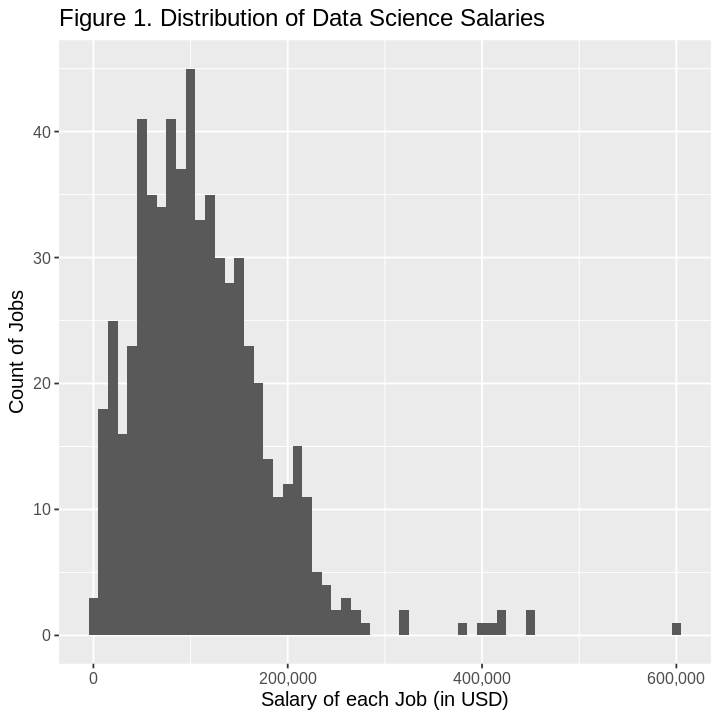

In [10]:
options(repr.plot.width=6, repr.plot.height=6)

p1 <- ggplot(data) +
    geom_histogram(aes(x = salary_in_usd), binwidth = 10000) +
    xlab("Salary of each Job (in USD)") +
    ylab("Count of Jobs") +
    ggtitle("Figure 1. Distribution of Data Science Salaries") + 
    scale_x_continuous(labels = scales::comma) +
    theme(text = element_text(size=12))
plot(p1)

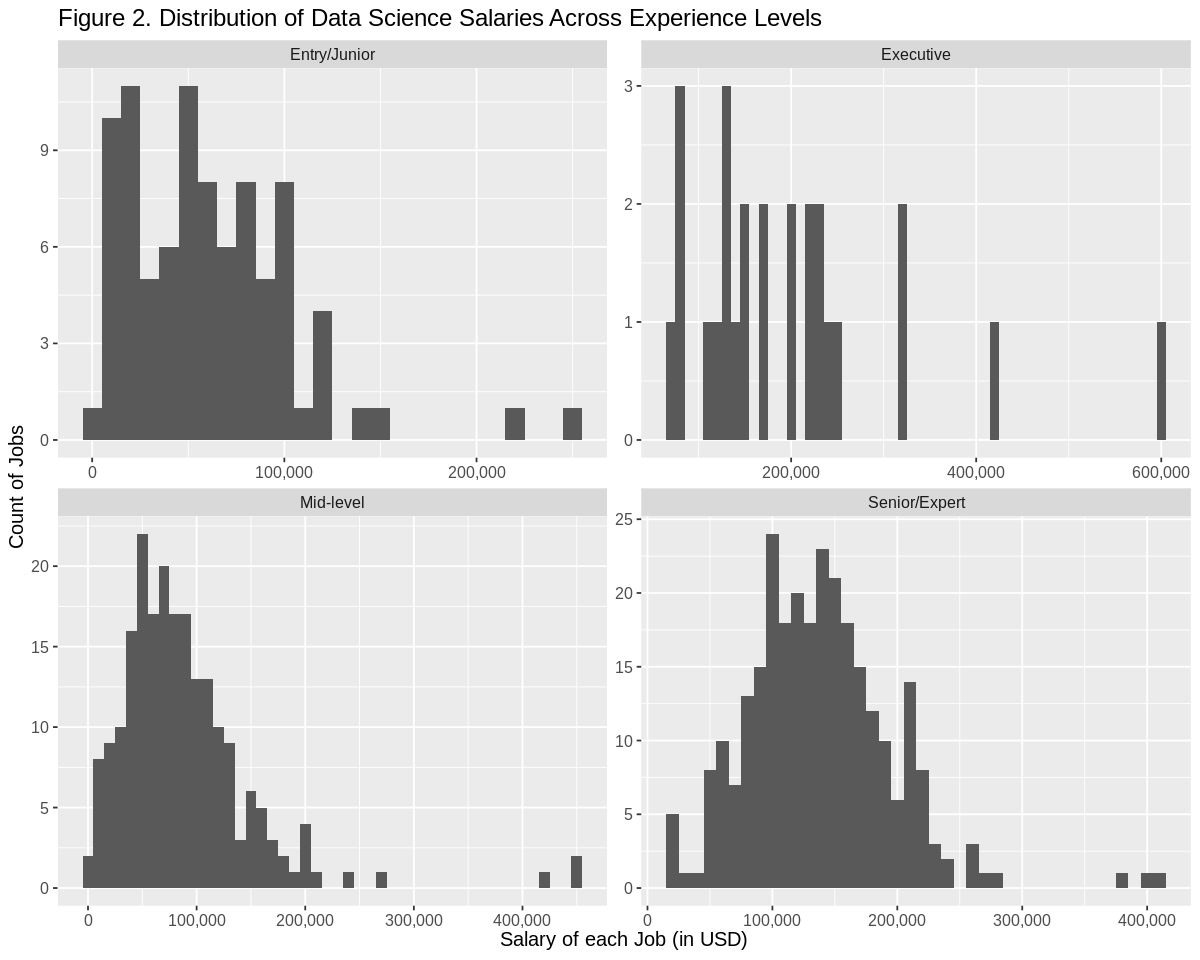

In [11]:
options(repr.plot.width=10, repr.plot.height=8)

# Plotting each Distribution
p2 <- ggplot(data) +
    geom_histogram(aes(x = salary_in_usd), binwidth = 10000) +
    xlab("Salary of each Job (in USD)") +
    ylab("Count of Jobs") +
    ggtitle("Figure 2. Distribution of Data Science Salaries Across Experience Levels") + 
    facet_wrap(~experience_level, scale="free") +
    scale_x_continuous(labels = scales::comma) +
    theme(text = element_text(size=12))
plot(p2)

Although this is very preliminary plotting, it gives us some insights about the trends and values in the `experience_level` explanatory variable such as:
- We see that general range of salaries for each of the 4 experience level groups
- We see that the median/mean salaries seem to increases positively with experience level
- We see the distribution values in the dataset to each experience levels (Which group is represented more/less)
- We can see that the *Executive* group contains fewer values than the rest, this asymmetry should considered during model creation.

This information allows us to create hypotheses so that we can verify and test if our model makes sense, and catch issues early such as the uneven counts in each group.

# Methods Plan

We noticed early on (and in EDA) that this dataset contains a considerable amount of categorical variables. However, in the context of our investigative question and the course material, we know that a **linear regression** model would fit best. Therefore, we have decided to perform two analyses to not only test the accuracy of each model, but also to investigate the benefits or risks of variable selection for datasets like this:
1. **MLR** without variable selection
2. **MLR** with one-hot-encoding and **backwards-variable selection**
This allows us to compare the $R^2$ and adjusted $R^2$ values to see which model may be a better approach.

> **Why is this method appropriate?**

As the goal question is to predict expected `salary_in_usd` while determining which explanatory variables are relevant, we feel an MLR allows us to test across multiple variables which may have a possible effect. Likewise, the coefficients and errors of each variable from the model, will allows us to see which has the greatest positive or negative effect. A notable step for both prediction MLR models is the split between `training` and `testing` data, which we have chosen to be approximately 30:70, to ensure we have an adequate sample size for both. This is done through the `initial_split()` function. After we produce the models of interest we will compute the Root-Mean Squared Error (RMSE) to determine how accurate our model is to the unseen data, similarly comparing the two models.

> **Which assumptions are required, if any, to apply the method selected?**

In the case of backwards selection, we must have more observations than variables. Similarly, we must conduct one-hot-encoding on the categorical variables, to ensure that proper variable selection is conducted.
Since we are using a linear regression model, we must assume:
    1. Linear relation between the variables, tested using a plot of residuals-fitted values
    2. Errors are independent (Not a time series)
    3. Normal distribution of errors
    4. Heteroscedasticity (Equal variance of error terms)
Some of these will be tested through the use of residual plots and Q-Q plots post-analysis.


> **What are potential limitations or weaknesses of the method selected?**

There is the risk that the relationship between our variables are not linear, or that a linear fit does not fit optimally. Similarly, alot of our data is categorical, meaning it may be difficult to produce an accurate linear model, and require encoding, which we are unsure how it will effect the results.

# Methods Analysis

Before we begin analysis, we will proceed to remove several low-occurence values, which may have negative affect on the accuracy of our models

In [78]:
new_data <- data %>%
    group_by(job_title) %>% 
    filter(n()>40) 

new_data <- new_data %>%
    group_by(company_location) %>% 
    filter(n()>10) 

new_data <- new_data %>%
    group_by(employee_residence) %>% 
    filter(n()>10)

# There are only 3 Non-Full-Time observations
# More optimal to remove variable
new_data <- new_data %>%
    select(-employment_type) 

new_data %>% 
    summary()

   work_year         experience_level                         job_title  
 Min.   :2020   Entry/Junior : 43     Data Scientist               :120  
 1st Qu.:2021   Executive    :  6     Data Engineer                :111  
 Median :2022   Mid-level    :115     Data Analyst                 : 91  
 Mean   :2022   Senior/Expert:184     Machine Learning Engineer    : 26  
 3rd Qu.:2022                         3D Computer Vision Researcher:  0  
 Max.   :2022                         AI Scientist                 :  0  
                                      (Other)                      :  0  
 salary_in_usd    employee_residence           remote_ratio company_location
 Min.   :  5679   US     :246        Stationary      : 85   US     :249     
 1st Qu.: 77921   GB     : 37        Partially remote: 36   GB     : 37     
 Median :111350   CA     : 15        Remote          :227   CA     : 14     
 Mean   :115785   IN     : 15                               IN     : 14     
 3rd Qu.:150000   ES   

## 1. MLR Without Variable Selection

In [79]:
set.seed(123)

# Splitting the dataset 70/30 for testing/training
data_split <- initial_split(new_data, prop = 0.7, strata = salary_in_usd)
training_set <- training(data_split)
testing_set <- testing(data_split)

In [80]:
head(training_set)

work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
2020,Mid-level,Data Analyst,46759,FR,Partially remote,FR,L
2020,Mid-level,Data Scientist,76958,GB,Remote,GB,S
2020,Mid-level,Data Engineer,70139,FR,Partially remote,FR,L
2020,Entry/Junior,Data Analyst,6072,IN,Stationary,IN,S
2020,Mid-level,Data Scientist,38776,ES,Remote,ES,M
2020,Entry/Junior,Data Scientist,62726,DE,Partially remote,DE,S


In [81]:
MLR_nonVS <- lm(salary_in_usd~., training_set) 
summary1 <- summary(MLR_nonVS)
summary1$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),242289.5290,12341621.416,0.01963190,9.843548e-01
work_year,-102.4208,6106.365,-0.01677279,9.866331e-01
experience_levelExecutive,103741.5137,18833.458,5.50836252,1.007087e-07
experience_levelMid-level,18427.7614,9070.272,2.03166587,4.338974e-02
experience_levelSenior/Expert,36215.2709,9146.699,3.95938143,1.014692e-04
job_titleData Engineer,30874.3806,6452.735,4.78469699,3.138733e-06
job_titleData Scientist,39918.4485,6298.759,6.33750987,1.303492e-09
job_titleMachine Learning Engineer,59533.0865,9765.303,6.09638918,4.812613e-09
employee_residenceDE,-24768.6751,22160.582,-1.11769065,2.649182e-01
employee_residenceES,39639.2264,53781.253,0.73704543,4.618800e-01


In [82]:
glance(summary1)

r.squared,adj.r.squared,sigma,statistic,p.value,df,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0.5994018,0.5629838,36753.99,16.45893,2.027745e-33,20,220,241


In [85]:
test_prediction1 <- predict(model1, newdata = testing_set)

Warning message in predict.lm(model1, newdata = testing_set):
“prediction from a rank-deficient fit may be misleading”


In [86]:
RMSE_model1 <- tibble(
  Model = "OLS Full Regression",
  RMSE = rmse(
    preds = test_prediction1,
    actuals = testing_set$salary_in_usd
  )
)
RMSE_model1

Model,RMSE
<chr>,<dbl>
OLS Full Regression,39594.15


The RMSE reveals that the average prediction is off by ~$39,594 which is incredibly inaccurate. However this may be the best results we can obtain from this dataset, as there are many outliers as well as categorical variables that make predictions inaccurate. Let's see if variable selection improves this:

## 2. MLR with One-Hot-Encoding and Backwards Selection

In [87]:
# One-hot encode categorical variables
new_data <- one_hot(as.data.table(new_data))
names(new_data)<-make.names(names(new_data),unique = TRUE)

In [88]:
set.seed(123)

data_split <- initial_split(new_data, prop = 0.7, strata = salary_in_usd)
training_set <- training(data_split)
testing_set <- testing(data_split)

In [89]:
data_backward_sel <- regsubsets(
  nvmax = 75,
  x = salary_in_usd ~ .,
  data = training_set,
  method = "backward",
)

data_backward_summary <- summary(data_backward_sel)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“148  linear dependencies found”


Reordering variables and trying again:


Selection detected linear dependences, so final selection only chooses 20 variables.

In [90]:
data_backward_summary_df <- tibble(
    n_input_variables = 1:20,
    RSQ = data_backward_summary$rsq,
    RSS = data_backward_summary$rss,
    ADJ.R2 = data_backward_summary$adjr2,
    Cp = data_backward_summary$cp,
    BIC = data_backward_summary$bic,
# )%>% arrange(desc(ADJ.R2))
) %>% arrange(Cp)

head(data_backward_summary_df)

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,0.5727975,316924943352,0.5542235,-142.2184,-144.6371
11,0.5796976,311806028804,0.5595084,-141.4585,-143.0766
9,0.5530150,331600850600,0.5356000,-140.6628,-139.2125
12,0.5808176,310975171967,0.5587553,-139.6598,-138.2349
8,0.5335437,346045848960,0.5174590,-139.1632,-134.4212
13,0.5891458,304796814826,0.5656167,-139.1567,-137.5864


Select the model with the highest Adjusted $R^2$ as we are trying to find best inference model

In [91]:
cp_min = which.min(data_backward_summary$cp)

In [92]:
selected_var <- names(coef(data_backward_sel, cp_min))[-1]
selected_var

[1] "experience_level_Entry.Junior"     "experience_level_Executive"       
 [3] "experience_level_Mid.level"        "company_location_IN"              
 [5] "job_title_Principal.Data.Engineer" "employee_residence_AR"            
 [7] "employee_residence_BO"             "employee_residence_BR"            
 [9] "employee_residence_DZ"             "company_location_DE"

In [93]:
training_subset <- training_set %>% select(all_of(selected_var), salary_in_usd)
testing_subset <- testing_set %>% select(all_of(selected_var), salary_in_usd)

In [94]:
data_MLR <- lm(salary_in_usd ~ .,
  data = training_subset
)
MLR_summary <- summary(data_MLR)

In [95]:
tidy(MLR_summary)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),138770.79,4062.557,34.158485,4.170682e-93
experience_level_Entry.Junior,-52086.35,9907.276,-5.257384,3.281100e-07
experience_level_Executive,65629.21,20823.947,3.151622,1.834738e-03
experience_level_Mid.level,-41181.87,6553.134,-6.284301,1.584192e-09
company_location_IN,-71922.81,14767.759,-4.870259,2.047825e-06
company_location_DE,-30567.40,19110.000,-1.599550,1.110420e-01


We notice that all the coefficients have substantial impact on the estimated values, ranging from approximately -30,000USD to +65,000USD, likewise with massive standard errors. This indicates that the relevant variables chosen for this model, while significant (from p-values), would result in inaccurate predictions that have huge ranges.

In [96]:
glance(data_MLR)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3393231,0.3252661,45669.05,24.13916,1.391917e-19,5,-2924.658,5863.315,5887.709,490130557755,235,241


This is further reflected by the `adj.r.squared` value of 0.3242661, which indicates that the model would be poor at predicting new values.

In [97]:
test_prediction2 <- predict(data_MLR, newdata = testing_subset)

Warning message in predict.lm(data_MLR, newdata = testing_subset):
“prediction from a rank-deficient fit may be misleading”


In [98]:
RMSE_model2 <- tibble(
  Model = "OLS Full Regression",
  RMSE = rmse(
    preds = test_prediction2,
    actuals = testing_subset$salary_in_usd
  )
)
RMSE_model2

Model,RMSE
<chr>,<dbl>
OLS Full Regression,43376.39


## Result Interpretation

In [99]:
linear_prediction1 <- data.frame(Predicted = test_prediction1, Observed = testing_set$salary_in_usd)

In [100]:
RMSE_model1

Model,RMSE
<chr>,<dbl>
OLS Full Regression,39594.15


In [101]:
RMSE_model2

Model,RMSE
<chr>,<dbl>
OLS Full Regression,43376.39


We see that the model without one-hot-encoding and variable selection fairs slightly better comparing RMSE, by approximately $4,000USD. That said both models are quite poor in predicting salaries from the test data. We can analyze some of the plots to get an indication on why.

Warning message:
“not plotting observations with leverage one:
  20, 109, 124”


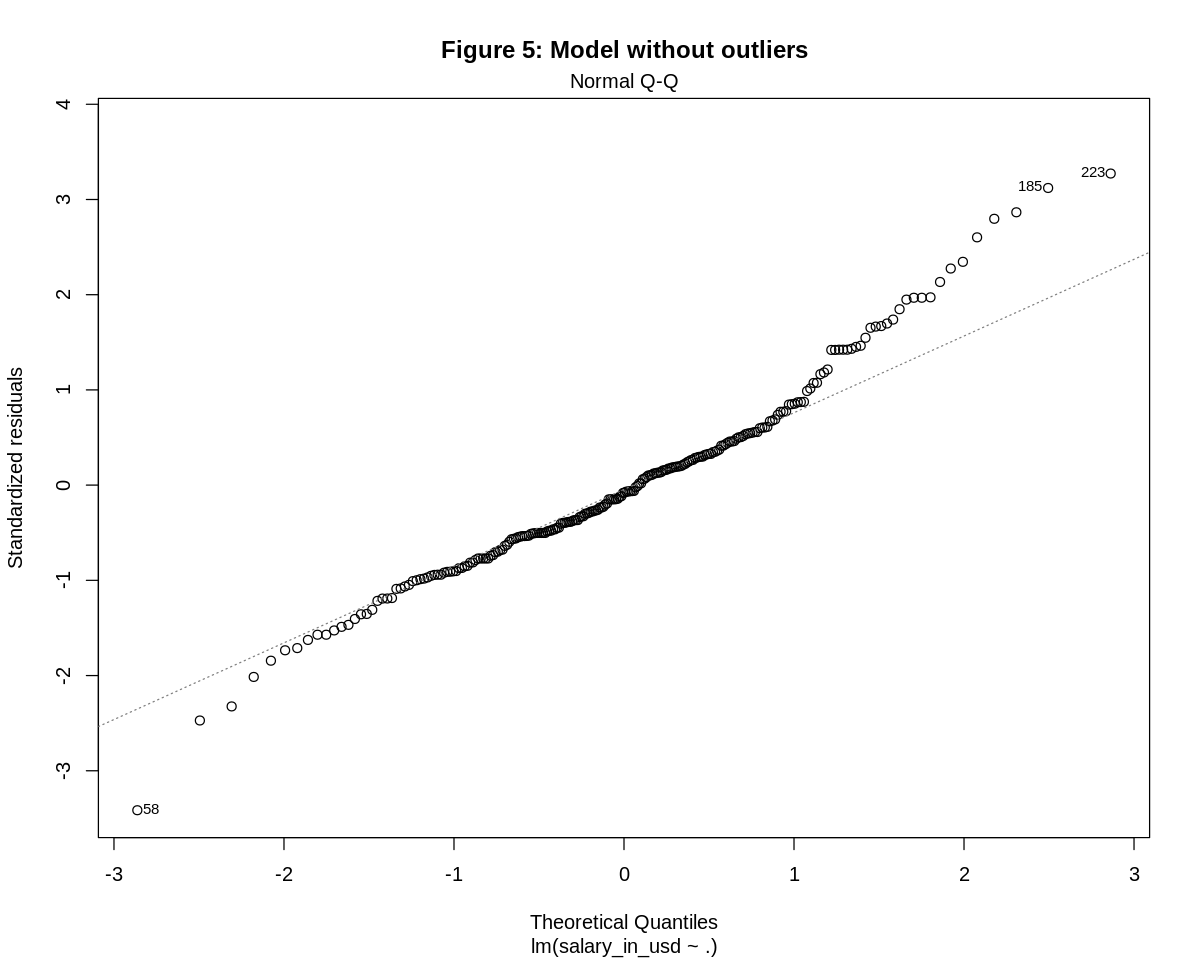

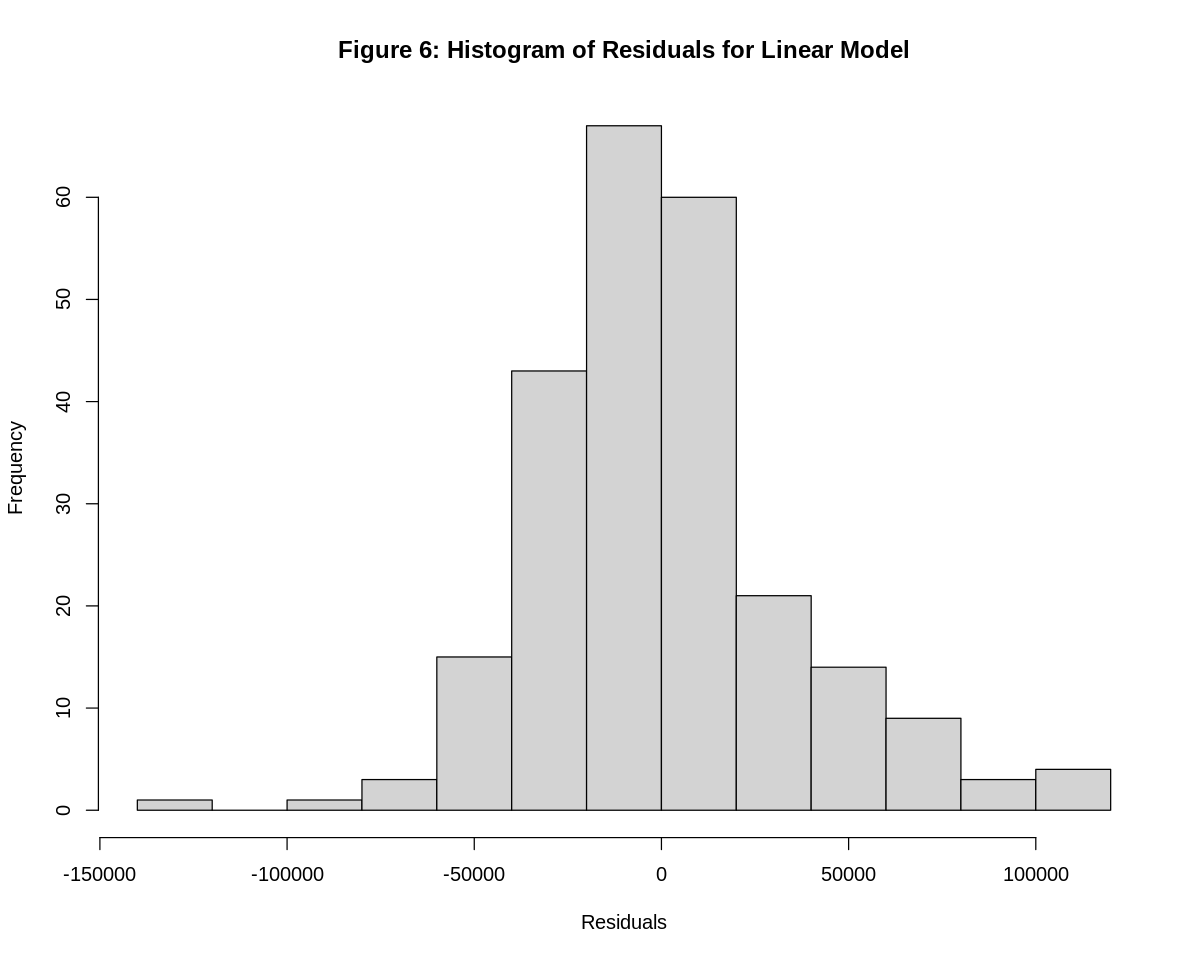

In [84]:
## Analyzing QQ plot and histogram of resiudals to ensure normality assumption is valid. 
plot(MLR_nonVS, 2, main = "Figure 5: Model without outliers")
hist(residuals(object = MLR_nonVS),
  breaks = 10,
  main = "Figure 6: Histogram of Residuals for Linear Model",
  xlab = "Residuals"
)
     

From the above plot we can see that the residuals are not exactly normally distributed. However this appears to be due to the presence of outliers in the data that have very large residual values, as the "middle" section of the QQ-plot is a mostly straight line along the 45 degree line, illustrating normality. It is just at the tails of the qq-plot where normality may not necessarily be present. The histogram of residuals appears to be approximately normal, with slightly longer tails. This once again references the outliers in the data.

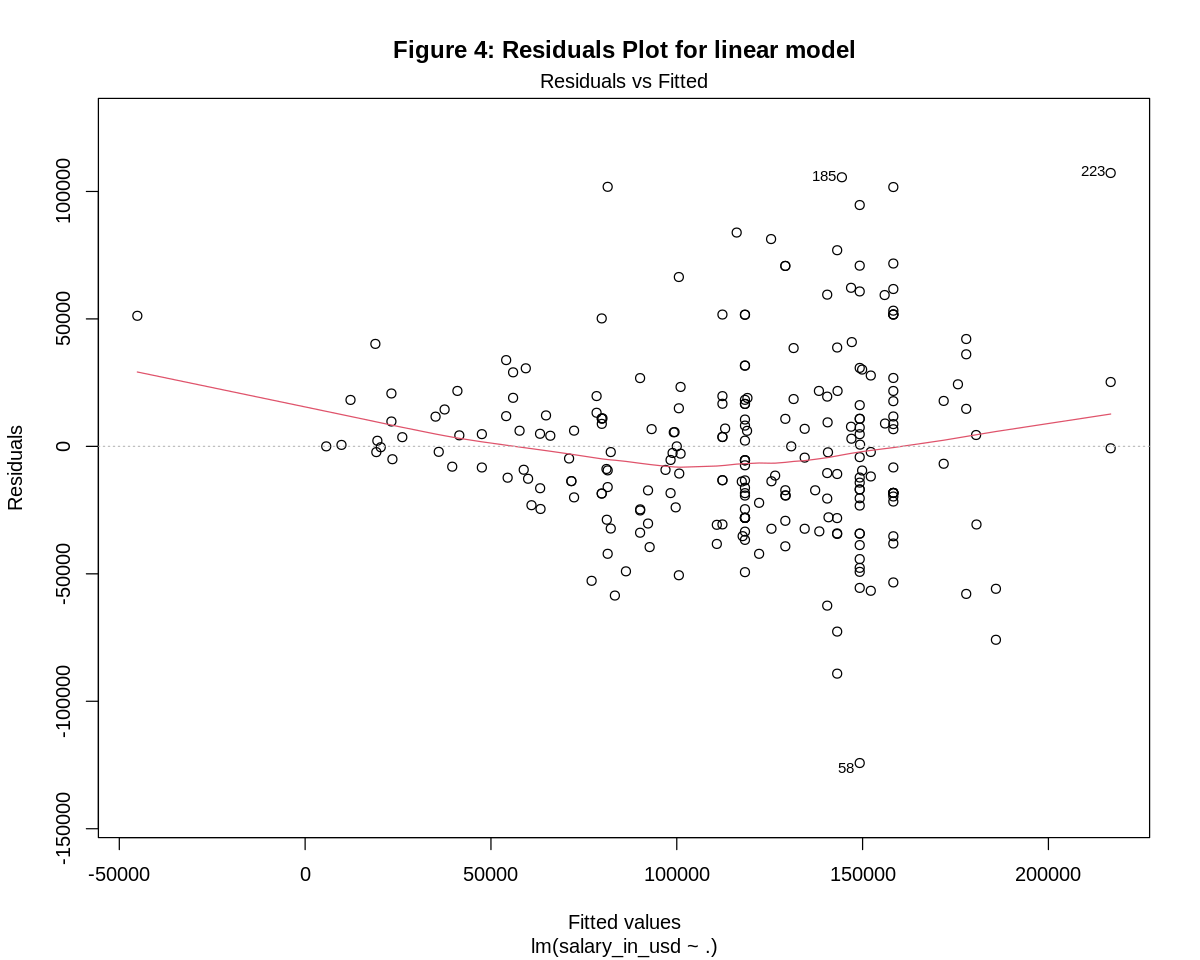

In [83]:
## Examining model for heteroscedacisity by looking at residual plots
plot(MLR_nonVS, 1, main = "Figure 4: Residuals Plot for linear model")

Even with fewer points, residuals still seem to be approximately randomly distributed about zero, with the points with lower fitted values being slightly under-predicted, showing a "funnel" shape. This plot implies homoscedasticity within our filtered dataset which is an issue of unequal variance.

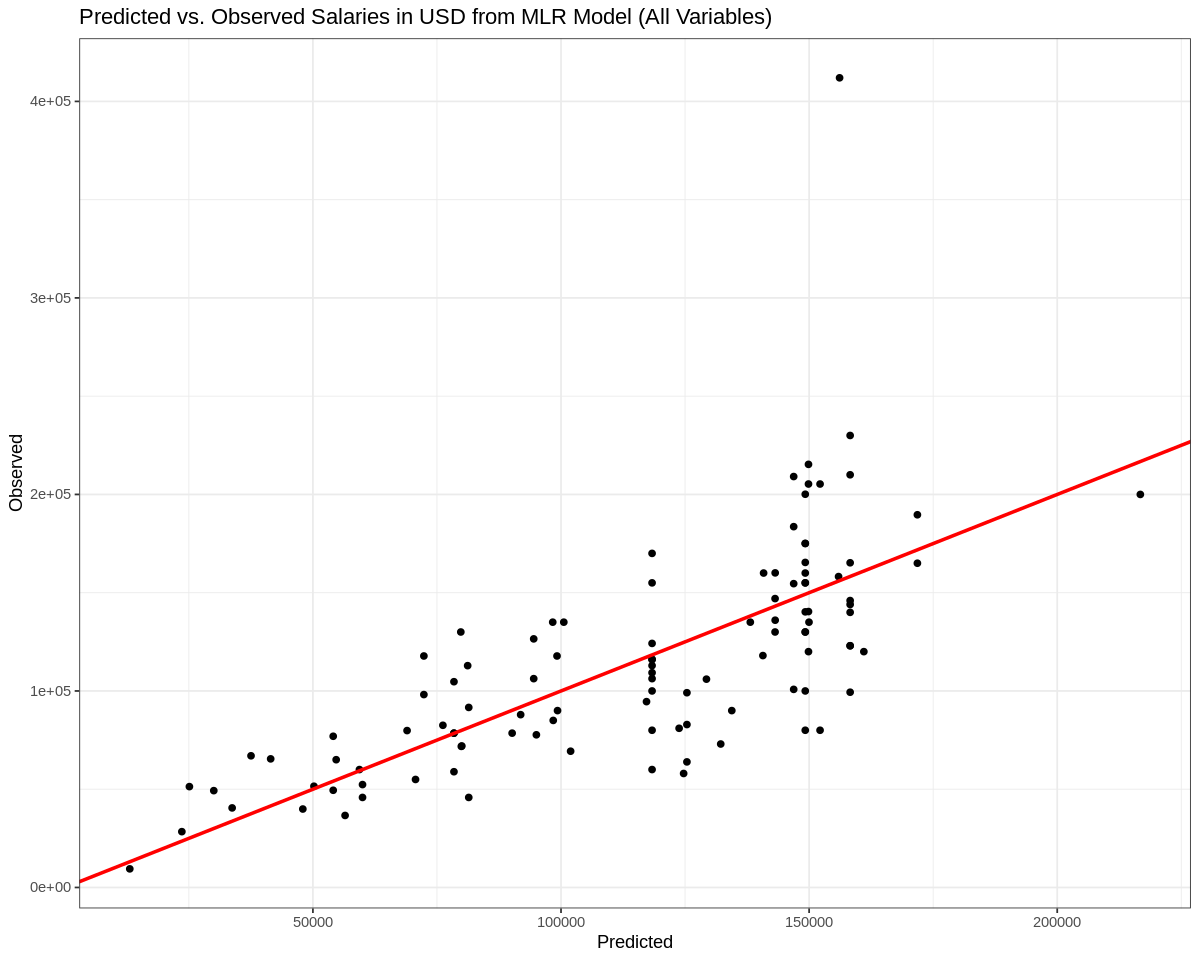

In [102]:
fig1 <- ggplot(linear_prediction1,
               aes(x = Predicted, y = Observed)) +
               geom_point() +
               geom_abline(intercept = 0,
                           slope = 1,
                           color = "red",
                           linewidth = 1)+
               ggtitle("Predicted vs. Observed Salaries in USD from MLR Model (All Variables)") +
               theme_bw()

fig1

Analyzing the results we see that both MLR models give poor prediction and low accuracy, with RMSE values of **39594.15** and **40947.49**, showing that the models are on average predicting salaries that are around 40,000 USD away from test values. This can be further seen by the **adjusted** $R^2$ from either model, showing values of **0.56** and **0.44** which is only slightly better than the intercept-only model. We attribute this largely to the fact that the dataset is primarily categorical variables, with data that may not fit well linear models or current methods of variable selection.

# Discussion